<a href="https://colab.research.google.com/github/Nitishagyawali/workshop1-of-AI/blob/main/classification_Nitisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/drive/MyDrive/AI CourseWork/happydata_balanced.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Part 1: Data Loading and Preprocessing
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI CourseWork/happydata_balanced.csv', encoding='ISO-8859-1')

# Rename columns for consistency
df.rename(columns={'ëvents': 'events'}, inplace=True)

# Define features and target
X = df.drop('happy', axis=1)
y = df['happy']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


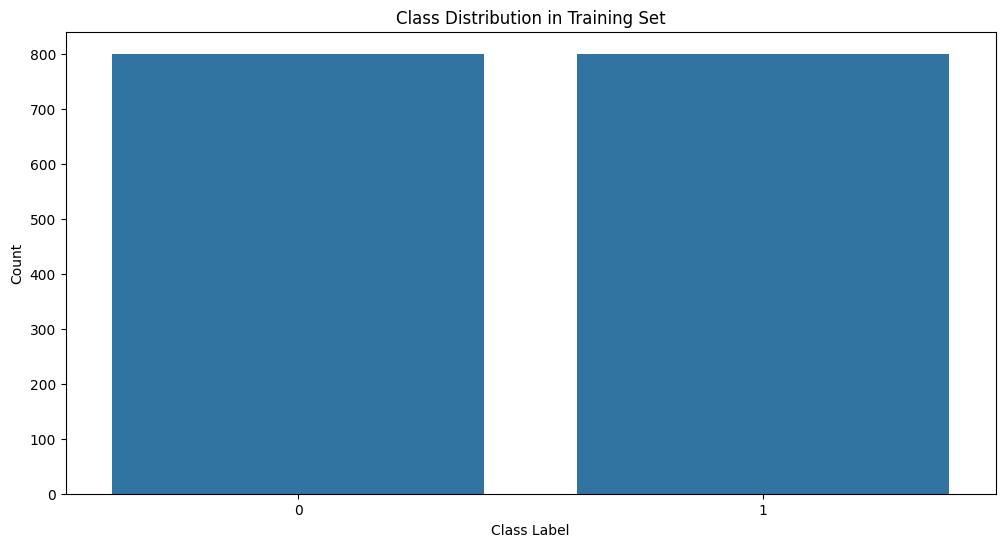

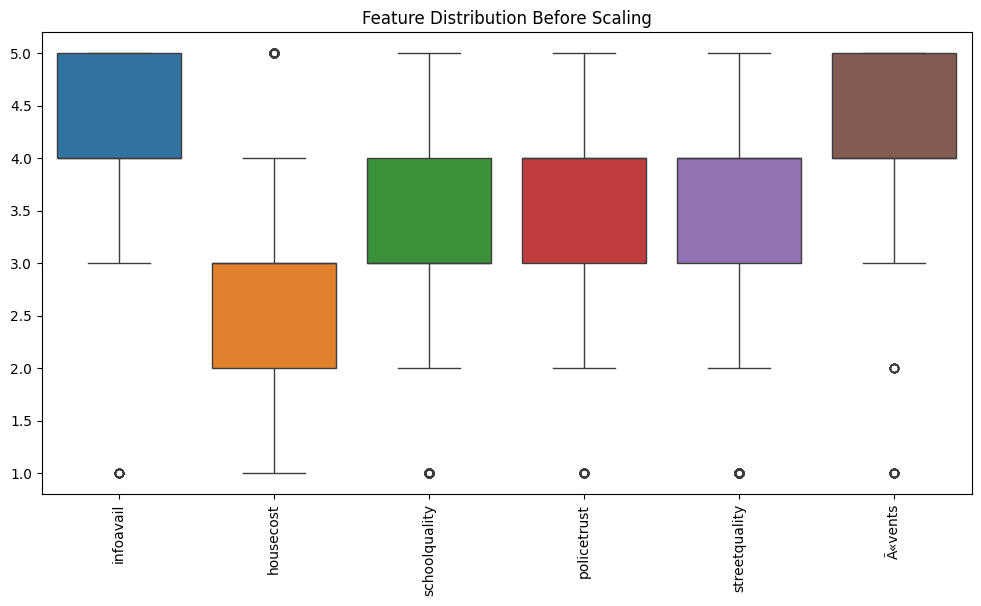

In [ ]:
# Part 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.title('Feature Distribution Before Scaling')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Part 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Part 4: Build Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    return weights, cost_history

# Add intercept term
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Train logistic regression model from scratch
weights, cost_history = gradient_descent(X_train_bias, y_train.values, weights, learning_rate=0.01, iterations=1000)

# Make predictions
y_pred_scratch = sigmoid(np.dot(X_test_bias, weights)) >= 0.5

# Evaluate the model
print("Logistic Regression from Scratch Accuracy:", accuracy_score(y_test, y_pred_scratch))

Logistic Regression from Scratch Accuracy: 0.6175


In [ ]:
# Part 5: Build Initial Classification Models
# Train Logistic Regression (sklearn)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.61
Random Forest Accuracy: 0.9525


In [ ]:
# Part 6: Hyperparameter Tuning with Cross-Validation
# Hyperparameter tuning for Logistic Regression
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)
print("Best LR params:", lr_grid.best_params_)

# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
print("Best RF params:", rf_grid.best_params_)


Best LR params: {'C': 0.01}
Best RF params: {'max_depth': None, 'n_estimators': 50}


In [ ]:
# Part 7: Feature Selection
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())



Selected Features: ['infoavail', 'schoolquality', 'policetrust', 'streetquality', 'Ã«vents']


In [ ]:

# Part 8: Build and Evaluate the Final Model

final_model = rf_grid.best_estimator_
final_model.fit(X_train_selected, y_train)
final_pred = final_model.predict(X_test_selected)
final_accuracy = accuracy_score(y_test, final_pred)
print("\nFinal Model Accuracy:", final_accuracy)
print("\nClassification Report:\n", classification_report(y_test, final_pred))



Final Model Accuracy: 0.8825

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       200
           1       0.89      0.88      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



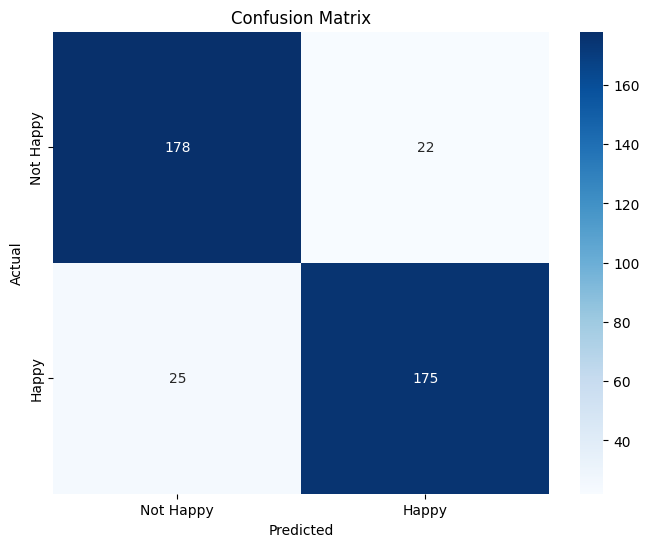

In [ ]:
# Part 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# Part 10: Additional Evaluation with Cross-Validation
cv_scores = cross_val_score(final_model, X_train_selected, y_train, cv=5)
print("Final Model Cross-Validation Accuracy:", np.mean(cv_scores))


Final Model Cross-Validation Accuracy: 0.880625
